In [ ]:
from tropical_cyclones import TCs, multi_plot, plot_trajectories
from aqua.core.util import load_yaml

config = load_yaml('config_tcs_notebook_era5.yaml')

/home/jost/miniconda3/envs/aqua/lib/python3.12/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.6 when it was built against 1.14.3, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [ ]:
# initialise tropical class with streaming options
tropical = TCs(tdict=config, streaming=True,
                stream_step=config['stream']['streamstep'],
                stream_startdate=config['time']['startdate'],
                paths=config['paths'],
                loglevel=config['setup']['loglevel'],
                orography=True,
                nproc=1)

In [ ]:
tropical.loop_streaming(config)

Getting trajectories from TempestExtremes file...
Running getTrajectories on '/work/users/jost/aqua/tc/tc_analysis/tmpdir/ERA5/era5/tempest_tracks_tot.txt' with unstruc set to '0'
nVars set to 10 and headerDelimStr set to 'start'
Found 10 columns
Found 11 trajectories
... done reading data


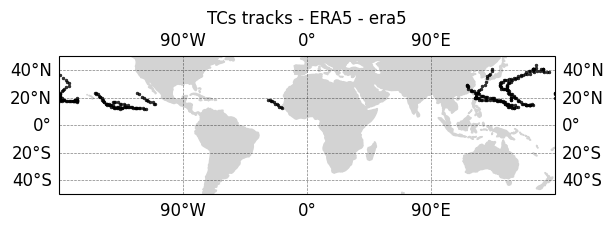

In [2]:
from glob import glob
import os

filenames = sorted(glob(os.path.join(config['paths']['trackdir'], config['dataset']['model'], config['dataset']['exp'], "tempest_track*.txt")))

with open(os.path.join(config['paths']['tmpdir'], config['dataset']['model'], config['dataset']['exp'], f"tempest_tracks_tot.txt"), 'w') as output_file:
    for fname in filenames:
        with open(fname) as infile:
            for line in infile:
                output_file.write(line)
tracks_file = os.path.join(config['paths']['tmpdir'], config['dataset']['model'], config['dataset']['exp'], "tempest_tracks_tot.txt")
plot_trajectories(tracks_file, config)